1.Introduction\
This assignment will help you to consolidate the concepts learnt in the
session.

2.Problem Statement

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.


Url=https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
cket','Fare','Cabin','E mbarked']

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

NOTE:The solution shared through Github should contain the source code used and the screen shot of the output.

3.Output

This assignment consists of 200 marks and has to be submitted in
.ipynb/PDF format in the upcoming session for evaluation.

In [1]:
#Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [4]:
titanic.drop(labels=["Name", "Ticket", "Cabin", "Embarked", "PassengerId"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
len(titanic)

891

#### Train-Test Split

In [6]:
X = titanic.iloc[:, 1:]
y = titanic.iloc[:, 0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(668, 6)
(223, 6)


#### Taking care of missing values

Train Dataset

In [7]:
#percentage of nan values present in Train dataset
features_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, X_train[feature].isnull().sum(),  '  missing values')

Age 133   missing values


In [8]:
age_grpy = X_train.groupby(['Sex', 'SibSp','Parch', 'Fare', 'Pclass']).median()['Age']
age_grpy

Sex     SibSp  Parch  Fare     Pclass
female  0      0      7.2250   3          NaN
                      7.2500   3         22.0
                      7.4958   3         18.0
                      7.5500   3         23.0
                      7.6292   3          NaN
                                         ... 
male    4      1      39.6875  3          1.5
               2      31.2750  3          4.0
                      31.3875  3          6.0
        5      2      46.9000  3          9.0
        8      2      69.5500  3          NaN
Name: Age, Length: 362, dtype: float64

In [9]:
X_train['Age'] = X_train.groupby(['Sex', 'SibSp','Parch', "Pclass", "Fare"])['Age'].apply(lambda x: x.fillna(x.median()))
X_train.Age.isnull().sum()

c:\users\allyson\anaconda3\envs\practice\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-9-35d38dcbfd72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'] = X_train.groupby(['Sex', 'SibSp','Parch', "Pclass", "Fare"])['Age'].apply(lambda x: x.fillna(x.median()))


65

In [10]:
X_train['Age'] = X_train.groupby(['Sex', 'SibSp','Parch', "Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))
X_train.Age.isnull().sum()

<ipython-input-10-ad05819d8920>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'] = X_train.groupby(['Sex', 'SibSp','Parch', "Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))


8

In [11]:
X_train['Age'] = X_train.groupby(["Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))
X_train.Age.isnull().sum()

<ipython-input-11-da83fb6fc112>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'] = X_train.groupby(["Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))


0

Test Dataset

In [12]:
#percentage of nan values present in Test dataset
features_nan=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, X_test[feature].isnull().sum(),  '  missing values')

Age 44   missing values


In [13]:
age_grpy = X_test.groupby(['Sex', 'SibSp','Parch', 'Fare', 'Pclass']).median()['Age']
age_grpy

Sex     SibSp  Parch  Fare      Pclass
female  0      0      6.7500    3         18.0
                      7.2250    3         15.0
                      7.2292    3         13.0
                      7.7333    3         16.0
                      7.7375    3          NaN
                                          ... 
male    3      2      27.9000   3         10.0
                      263.0000  1         19.0
        4      1      29.1250   3          7.0
                      39.6875   3         14.0
        5      2      46.9000   3         14.0
Name: Age, Length: 153, dtype: float64

In [14]:
X_test['Age'] = X_test.groupby(['Sex', 'SibSp','Parch', "Pclass", "Fare"])['Age'].apply(lambda x: x.fillna(x.median()))
X_test.Age.isnull().sum()

<ipython-input-14-c3079032c028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = X_test.groupby(['Sex', 'SibSp','Parch', "Pclass", "Fare"])['Age'].apply(lambda x: x.fillna(x.median()))


23

In [15]:
X_test['Age'] = X_test.groupby(['Sex', 'SibSp','Parch', "Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))
X_test.Age.isnull().sum()

<ipython-input-15-52b1c415c5f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = X_test.groupby(['Sex', 'SibSp','Parch', "Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))


1

In [16]:
X_test['Age'] = X_test.groupby(["Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))
X_test.Age.isnull().sum()

<ipython-input-16-c04d587e3876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = X_test.groupby(["Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))


0

#### Taking care of Outliers

##### Train Dataset

**Fare**

Text(0, 0.5, 'No of passenger')

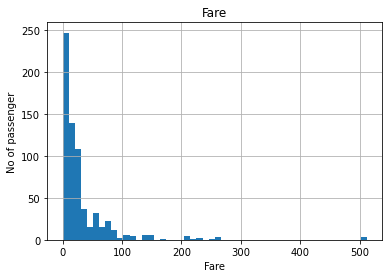

In [17]:
figure=X_train.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

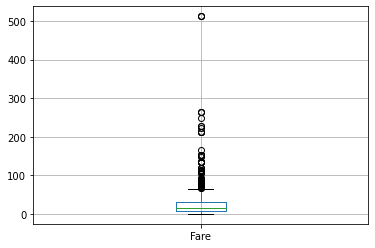

In [18]:
##Fare

X_train.boxplot(column="Fare")

In [19]:
X_train['Fare'].describe()

count    668.000000
mean      32.373621
std       50.632021
min        0.000000
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [20]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=X_train.Fare.quantile(0.75)-X_train.Fare.quantile(0.25)
lower_bridge=X_train['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=X_train['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-62.125
101.32499999999999


(None, None)

In [21]:
X_train.loc[X_train['Fare']>=101,'Fare']=101

c:\users\allyson\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Text(0, 0.5, 'No of passenger')

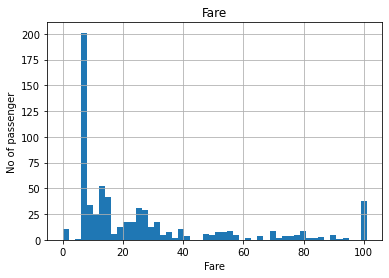

In [22]:
figure=X_train.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

#### Encoding Sex column variables

In [23]:
sex=pd.get_dummies(pd.get_dummies(X_train[["Sex"]]), drop_first=True)
X_train=X_train.join(sex)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_female,Sex_male
105,3,male,28.0,0,0,7.8958,0,1
68,3,female,17.0,4,2,7.9250,1,0
253,3,male,30.0,1,0,16.1000,0,1
320,3,male,22.0,0,0,7.2500,0,1
706,2,female,45.0,0,0,13.5000,1,0


In [24]:
X_train.drop(labels=["Sex", "Sex_female"], axis=1, inplace=True)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
105,3,28.0,0,0,7.8958,1
68,3,17.0,4,2,7.9250,0
253,3,30.0,1,0,16.1000,1
320,3,22.0,0,0,7.2500,1
706,2,45.0,0,0,13.5000,0


##### Test Dataset

In [25]:
X_test.Fare.describe()

count    223.000000
mean      31.696729
std       46.875335
min        0.000000
25%        7.895800
50%       13.000000
75%       30.000000
max      263.000000
Name: Fare, dtype: float64

similar Fare distribution to training dataset, we will 101 capping limit for Fare for Test dataset

In [26]:
X_test.loc[X_test['Fare']>=101,'Fare']=101

c:\users\allyson\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [27]:
sex=pd.get_dummies(pd.get_dummies(X_test[["Sex"]]), drop_first=True)
X_test=X_test.join(sex)
X_test.drop(labels=["Sex", "Sex_female"], axis=1, inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
495,3,23.0,0,0,14.4583,1
648,3,23.0,0,0,7.5500,1
278,3,7.0,4,1,29.1250,1
31,1,35.0,1,0,101.0000,0
255,3,29.0,0,2,15.2458,0


#### Model Training

In [28]:
X_train=X_train.values
X_test=X_test.values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Decision Tree Model

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [31]:
cv = cross_val_score(classifier,X_train,y_train,cv=5)
print(cv)
print(round(cv.mean()*100,2))

[0.7761194  0.79104478 0.74626866 0.78195489 0.78195489]
77.55


In [32]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred)*100,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)

DecisionTrees's Accuracy:  82.51
[[122  17]
 [ 22  62]]


**This model performance and accuracy are relatively good when the hyperparameters are tuned**